# HERA Imaging Demo

**CHAMP Bootcamp**
<br>
**June 10, 2022**
<br>

• This notebook will guide you along the general steps needed to image HERA data with the `CASA` software. Given you have introduced to `CASA`, it is assumed you have some familiarity with imaging and the CLEAN deconvolution algorithm.

• This notebook is *not* meant to be run interactively, and only contains instructions on how to use CASA **interactively from your command line**. 
Instructions on running CASA on NRAO machine can be found here: https://github.com/HERA-Team/CHAMP_Bootcamp/blob/main/Lessons/Interferometry/2022_Setup.md

• Given that, all code in this notebook is meant to be run either from the bash shell (lines starting with `$`) or from a CASA session (lines starting with `>>>`)



# A) : Imaging un-calibrated data

To begin, lets us have a look at the un-calibrated data. 

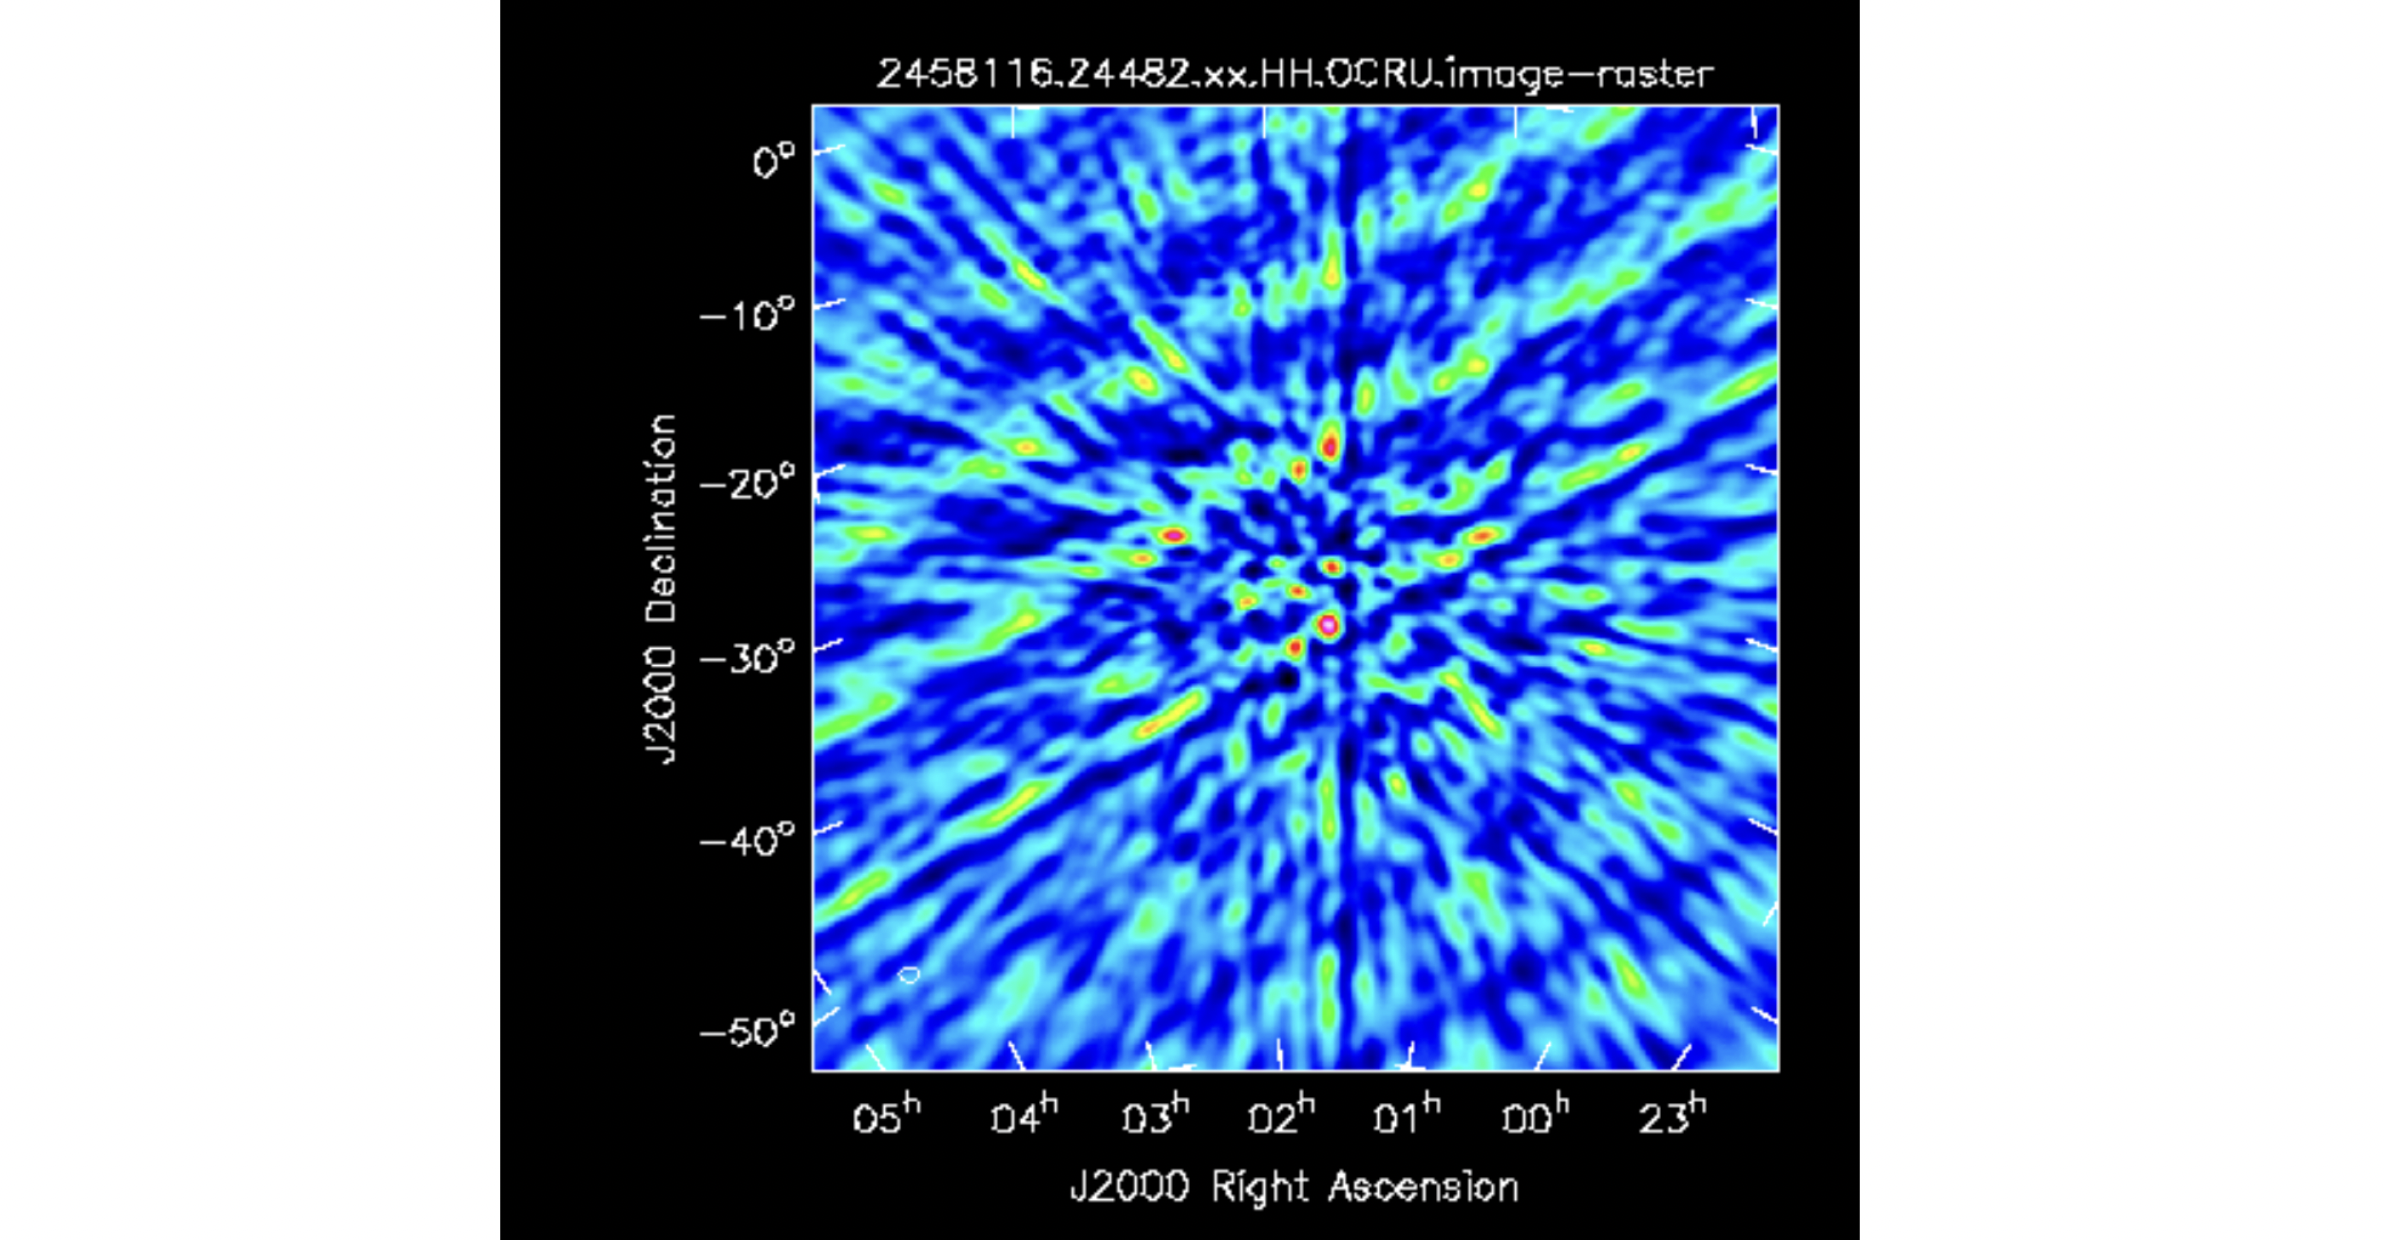

# B) Imaging calibrated data

# 1) Glimpse of the dataset

Use `/users/zxu/lustre/champ_data/HERADataPartII/zen.2458116.24482.xx.HH.uvOCR.ms`

You can enter a casa session by just typing into your command line

`$ casa`

which will enter you into a Python-looking session (and it is Python!) but it has some special pre-loaded modules that are specific to the CASA software. 

One of these is the **`listobs`** function, which will give you a summary of the observation. Try running that on your measurement set and looking at your CASA logger for the output.


Can you answer the following questions:

• When was this data observed? 


• How long did the observation last?


• How many antennas were used in taking this data?
    

• At which frequencies were the data observed?


• At what sky position was the array pointed during the observation?


# 2) Plotting the uv-coverage

The uv-coverage represents the spatial frequencies the radio interferometer traces. The denser or compact the uv-coverage, the better is the image.

```
>>> vis = '/users/zxu/lustre/champ_data/HERADataPartII/zen.2458116.24482.xx.HH.uvOCR.ms'
>>> plotms(vis, xaxis='U', yaxis='V', antenna='24', plotfile='uvcoverage_ant24.png') 
```

* `antenna = ''` includes all the antennas.

`>>> plotms(vis, xaxis='U', yaxis='V', antenna='', plotfile='uvcoverage.png') `

* Does the uv-coverage change if you use single or subset of antennas?


# 3) Make a "dirty" image of the data

A dirty image is an image that has not been *deconvolved*, that is to say that the effects of incomplete uv-sampling distorts the image from the underlying "true" sky signal. That being the case, making and looking at dirty images is good way to get a "quick-look" at the data and diagnose possible problems.

To make a diry image we will use the CASA `clean` function you used before, but this time we will set `niter=0`. This will mean that it will fourier transform the data to create an image, but it won't attempt to deconvolve (or CLEAN) the image.

```
>>> imagename = 'image'
>>> tclean(vis, imagename=imagename, niter=0, cell='400arcsec', imsize=512, spw='0:100~924', interactive=False)
```

Let's step through each of these parameters:

• `visname` is a string of the MS filename. 

• `imagename` is a string for the output image. Something like `imagename = visname + 'nocal'` should work.

• `niter=0` means it **will not** attempt to deconvolve the data (which is what we want for now!)

• `cell='400arcsec'` this means that the image will have pixels that are 400 arcseconds in size.

• `imsize=512` this means that the image will contain 512 cells on each side, to make a 512 x 512 image.

• `spw='0:100~924'` means it will use the zeroth spectral window (only one exists anyways) and take channels 100 to 924. We ignore the first and last 100 channels because they are almost always subnominal.

• `interactive=False` this means we won't do an interactive deconvolution, but this doesn't matter because we won't be deconvolving anyways (hence the name "dirty" image).

Once that is completed, you can remove the mask0 to see the widefield image using

`>>> ia.open(imagename+'.image')`

`>>> ia.maskhandler('delete', 'mask0')`

`>>> ia.close()`

You can open the CASA viewer to look at the image via

`>>> viewer(imagename+'.image')`


• What does the image look like? 


• How did the calibrated image change relative to the un-calibrated image? Did you expect this?



• Can you make any sense of why it might look the way it does? What does the PSF look like?

# 4) Use `clean` to deconvolve the image

Before we were making dirty images, which if you recall, means that we were not deconvolving the image. That is to say, point sources in the image are spreading their flux throughout the image in a way governed by the point spread function (PSF). Deconvolution is an attempt to correct for this. There are a few algorithms to do this, but we will stick to the CLEAN algorithm implemented in CASA's `clean` function.

We already did this interactively in the Interferometry lesson. If you recall, you perform an interactive clean by specifying the argument

`>>> tclean(vis, imagename=imagename, niter=0, cell='400arcsec', imsize=512, spw='0:100~924', interactive=True)`

If you'd like to perform a non-interactive deconvolution (i.e. a one-shot attempt), you can do this by setting `interactive=False` and specifying parameters like `niter` and `threshold` to tell CLEAN when to stop the deconvolution. 

```
>>> imagename_clean='image_clean'
>>> tclean(vis, imagename=imagename_clean, niter=100, cell='400arcsec', imsize=512, spw='0:100~924')
```

You can also specify a `mask` to tell CLEAN where to put model point sources (similar to making source boxes in an interactive CLEAN). The `mask` parameter takes the following form: `mask = circle[[01h43m00s, -30d48m0s], 32000arcsec]` where the first two numbers tell where to center the circular mask in RA and Dec, and the third number is the size of the mask in arcseconds. **Note:** if you use a mask, don't use the RA Dec values shown here: figure out what the appropriate coordinates should be given your previous dirty image!


After making and inspecting the image, try to answer the following questions:

• How did the deconvolved/clean image change relative to the dirty image?


• How many sources can you see in your image?


• What is the peak flux of the brightest source in the field?


• What is the rough RMS noise level of the image?



---

Congrats! You've made it to the end of the demo. By now you should have been able to make images from both un-calibrated and calibrated data! Hopefully this demonstrates the importance of calibration on all of the science that we do with the HERA instrument: good calibration is of utmost importance to yield science-quality data that we can then use to learn something about when and how the Epoch of Reionization took place.